<a href="https://colab.research.google.com/github/woodRock/deep-learning-goodfellow/blob/main/chapter_3_probability_and_information_theory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 3 | Probability and Information Theory

**Frequentist probability** - rates at which events occur.

**Bayesian probability** - qualitative levels of certainty.

Scenario: Estimating the probability of a coin being fair.
Frequentist approach:

1. Hypothesis: The coin is fair (50% chance of heads)
2. Experiment: Flip the coin 100 times
3. Results: We get 55 heads and 45 tails
4. Analysis: Calculate the p-value to determine if this result is statistically significant

The frequentist would focus on the likelihood of observing this data if the null hypothesis (fair coin) were true. They might conclude that the deviation from 50/50 is not statistically significant, so they fail to reject the null hypothesis.

Bayesian approach:

1. Prior belief: We start with a prior probability that the coin is fair
2. Data: We observe 55 heads in 100 flips
3. Update: We use Bayes' theorem to update our belief
4. Posterior: We end up with a posterior probability distribution for the fairness of the coin

The Bayesian would quantify their uncertainty about the coin's fairness before and after seeing the data. They might conclude that while a fair coin is still plausible, there's now a higher probability that the coin is slightly biased towards heads.

# Random Variables

A **random variable** is a variable that can take on different values randomly

# Probability Distributions

A **probability distribution** is a description of how likely a random variable or set of randomm variables is to take on each of its possible states.

## Discete Variables and Probability Mass Functions

A probability distribution over discrete variables may be described using a **probability mass function** (PMF).

Probability mass functions can act on many variables at the same time. Such a probability idstribution over many variables is none as a **joint probability distribution**.

To be a PMF on range variable $x$, a function $P$ must satisfy the following properites.

- The domain of P must be the set of all possible states of $\texttt{x}$.
- $ \forall x \in \texttt{x}, 0 \ge x \ge 1$ probability is between $p(x) \in [0,1]$
- $\sum_{x \in x} P(x) = 1$, normalized i.e., sums to 1.

A **uniform distribution** on $\texttt{x}$ - that is, make each of its states equally likely - by setting its PMF to

$$
  P(\texttt{x} = x_i) = \frac{1}{k} \\
  \sum_i P(\texttt{x} = x_i) = \sum_i \frac{1}{k} = \frac{k}{k} = 1
$$

The uniform distribution is normalized.


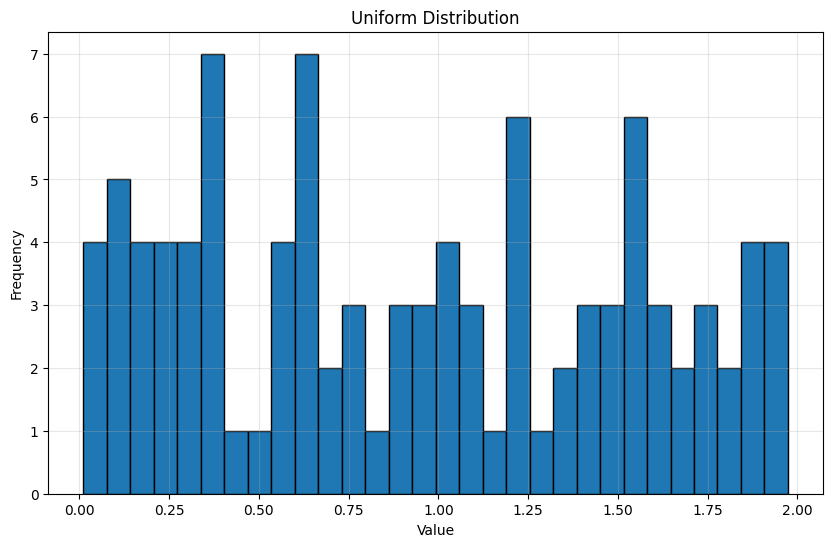

Mean: 0.94
Median: 0.93
Standard Deviation: 0.59


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate uniform distribution
low = 0  # Lower bound
high = 2  # Upper bound
size = 100  # Number of samples

uniform_samples = np.random.uniform(low, high, size)

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(uniform_samples, bins=30, edgecolor='black')
plt.title('Uniform Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

# Calculate statistics
mean = np.mean(uniform_samples)
median = np.median(uniform_samples)
std_dev = np.std(uniform_samples)

print(f"Mean: {mean:.2f}")
print(f"Median: {median:.2f}")
print(f"Standard Deviation: {std_dev:.2f}")

# Continious Variables and Probability Density Functions

**probability density function** - when working with continious variables, we descrube the probability distribution using a probability density function (PDF).

To be a PDF on range variable $x$, a function $P$ must satisfy the following properites.

1. The domain of $p$ must be the set of all possible states of $\texttt{x}$.
2. $ \forall x \in \texttt{x}, p(x) \ge 0 $. Note that we do not require $p(x) \ge 1$
3. $\int p(x) dx = 1$. The integral of a PDF must integrate to 1.

We can integrate the density function to find the actual probability mass of a set of points. Specifically the probability that $x$ lies in some set $\mathbb{S}$ is given by the integral of $p(x)$ over that set. The probability that $x$ lies in the interval $[a,b]$ is given by $\int_{[a,b]} p(x) dx$.

Uniform probability density function

$$
  u(x;a,b) \\
  u(x;a,b) = 0, \forall x \notin [a,b] \\
  u(x;a,b) = \frac{1}{b-a}
$$

Where ";" means is parameterized by. We can see that this is non-negative everywhere, and it integrates to 1.

We often denote that $x$ follows the uniform distribution on $[a,b]$ by writing

$$ x \sim U(a,b) $$



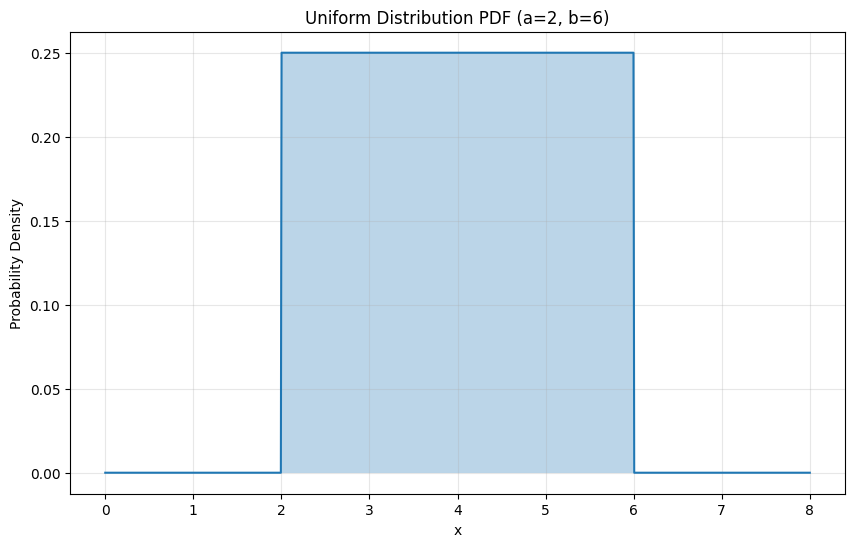

Total area under the curve: 1.001001


In [7]:
import numpy as np
import matplotlib.pyplot as plt

def uniform_pdf(x, a, b):
    """
    Probability Density Function for a uniform distribution.

    Parameters:
    x : float or array-like
        The point(s) at which to evaluate the PDF
    a : float
        Lower bound of the distribution
    b : float
        Upper bound of the distribution

    Returns:
    float or array-like
        The PDF value(s) at point(s) x
    """
    if np.isscalar(x):
        return 1 / (b - a) if a <= x <= b else 0
    else:
        return np.where((x >= a) & (x <= b), 1 / (b - a), 0)

# Example usage and visualization
a, b = 2, 6  # Lower and upper bounds
x = np.linspace(0, 8, 1000)  # Points to evaluate the PDF

y = uniform_pdf(x, a, b)

plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.fill_between(x, y, where=(x >= a) & (x <= b), alpha=0.3)
plt.title(f'Uniform Distribution PDF (a={a}, b={b})')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.grid(True, alpha=0.3)
plt.show()

# Verify that the total area under the curve is 1
print(f"Total area under the curve: {np.trapz(y, x):.6f}")

# Marginal probability

Some times we kno the probability distribution over a set of variables and we want to know the probability distribution over just a subset of them. The probability distribution over the subset is known as the **marginal probability distribution**.

For example suppose we have discrete random variables $\texttt{x}$ and $\texttt{y}$, and we know $P(\texttt{x},\texttt{y})$. We can find $P(\texttt{x})$ using the **sum rule**

$$ \forall x \in \texttt{x}, P(\texttt{x} = x) = \sum_y P(\texttt{x} = x, \texttt{y} = y) $$

For continious variables, we need to use integration instead of summation:

$$ p(x) = \int p(x,y) dy $$

Joint Probability Distribution P(X, Y):
[[0.1  0.15 0.05]
 [0.08 0.3  0.12]
 [0.02 0.1  0.08]]

Marginal Probability P(X):
[0.3 0.5 0.2]

Marginal Probability P(Y):
[0.2  0.55 0.25]

Sum of all probabilities: 1.000000
Sum of P(X): 1.000000
Sum of P(Y): 1.000000


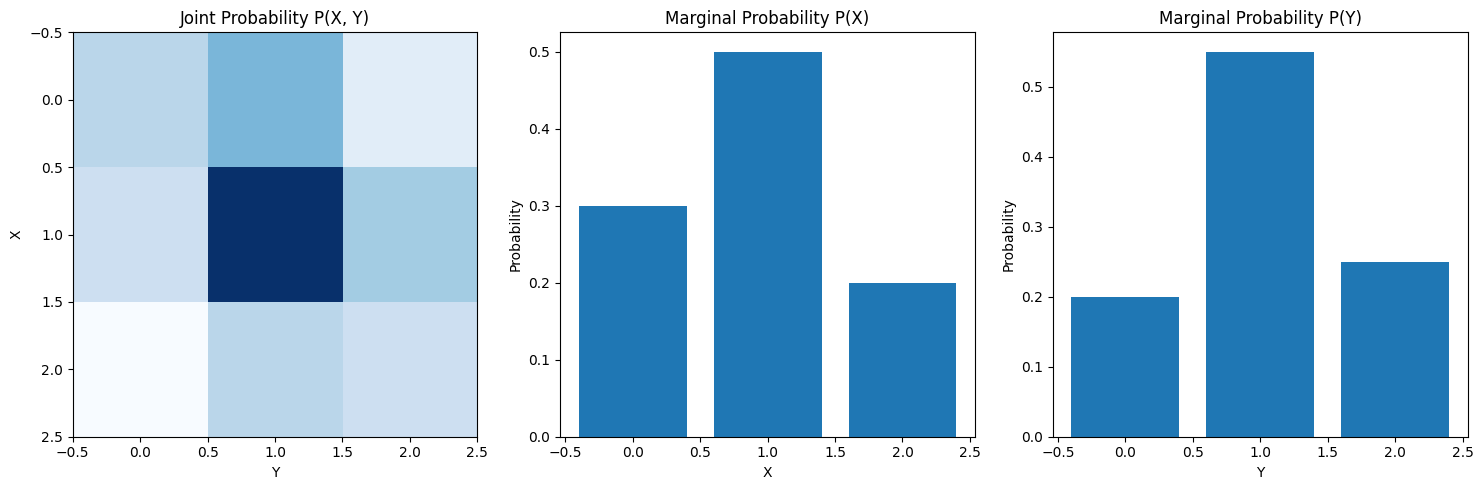

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Create a joint probability distribution
# Let's say this represents P(X, Y) where X and Y are discrete random variables
joint_prob = np.array([
    [0.1, 0.15, 0.05],
    [0.08, 0.3, 0.12],
    [0.02, 0.1, 0.08]
])

# Calculate marginal probabilities
marginal_x = np.sum(joint_prob, axis=1)  # Sum over columns (Y)
marginal_y = np.sum(joint_prob, axis=0)  # Sum over rows (X)

print("Joint Probability Distribution P(X, Y):")
print(joint_prob)
print("\nMarginal Probability P(X):")
print(marginal_x)
print("\nMarginal Probability P(Y):")
print(marginal_y)

# Verify that probabilities sum to 1
print(f"\nSum of all probabilities: {np.sum(joint_prob):.6f}")
print(f"Sum of P(X): {np.sum(marginal_x):.6f}")
print(f"Sum of P(Y): {np.sum(marginal_y):.6f}")

# Visualize the distributions
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.imshow(joint_prob, cmap='Blues')
ax1.set_title('Joint Probability P(X, Y)')
ax1.set_xlabel('Y')
ax1.set_ylabel('X')

ax2.bar(range(len(marginal_x)), marginal_x)
ax2.set_title('Marginal Probability P(X)')
ax2.set_xlabel('X')
ax2.set_ylabel('Probability')

ax3.bar(range(len(marginal_y)), marginal_y)
ax3.set_title('Marginal Probability P(Y)')
ax3.set_xlabel('Y')
ax3.set_ylabel('Probability')

plt.tight_layout()
plt.show()

# Conditional Probability

In many cases, we are interested in the probability of some event, given that some other event has happened. This is called **conditional probability**.

$$ P (\texttt{y} = y | \texttt{x} = x) = \frac{P(\texttt{y} = y, \texttt{x} = x)}{P(\texttt{x} = x)} $$

Joint Probability Table:
[[0.4 0.1]
 [0.2 0.3]]

Marginal Probability of Weather:
P(Sunny) = 0.50
P(Rainy) = 0.50

Marginal Probability of Walk:
P(Walk=Yes) = 0.60
P(Walk=No) = 0.40

Conditional Probabilities:
P(Walk=Yes | Sunny) = 0.80
P(Walk=No | Sunny) = 0.20
P(Walk=Yes | Rainy) = 0.40
P(Walk=No | Rainy) = 0.60


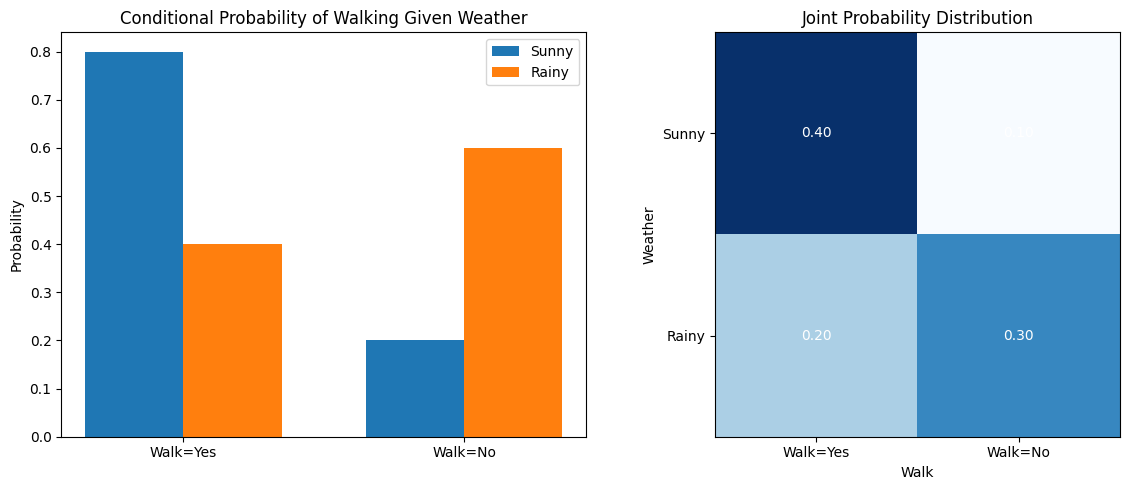

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Let's consider a scenario: Weather (Sunny or Rainy) and Taking a Walk (Yes or No)

# Joint probability table
# Rows: Weather (Sunny, Rainy)
# Columns: Walk (Yes, No)
joint_prob = np.array([
    [0.40, 0.10],  # Sunny
    [0.20, 0.30]   # Rainy
])

# Calculate marginal probabilities
p_weather = np.sum(joint_prob, axis=1)
p_walk = np.sum(joint_prob, axis=0)

# Calculate conditional probabilities
p_walk_given_sunny = joint_prob[0] / p_weather[0]
p_walk_given_rainy = joint_prob[1] / p_weather[1]

print("Joint Probability Table:")
print(joint_prob)
print("\nMarginal Probability of Weather:")
print(f"P(Sunny) = {p_weather[0]:.2f}")
print(f"P(Rainy) = {p_weather[1]:.2f}")
print("\nMarginal Probability of Walk:")
print(f"P(Walk=Yes) = {p_walk[0]:.2f}")
print(f"P(Walk=No) = {p_walk[1]:.2f}")
print("\nConditional Probabilities:")
print(f"P(Walk=Yes | Sunny) = {p_walk_given_sunny[0]:.2f}")
print(f"P(Walk=No | Sunny) = {p_walk_given_sunny[1]:.2f}")
print(f"P(Walk=Yes | Rainy) = {p_walk_given_rainy[0]:.2f}")
print(f"P(Walk=No | Rainy) = {p_walk_given_rainy[1]:.2f}")

# Visualize conditional probabilities
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

labels = ['Walk=Yes', 'Walk=No']
sunny_probs = p_walk_given_sunny
rainy_probs = p_walk_given_rainy

x = np.arange(len(labels))
width = 0.35

ax1.bar(x - width/2, sunny_probs, width, label='Sunny')
ax1.bar(x + width/2, rainy_probs, width, label='Rainy')
ax1.set_ylabel('Probability')
ax1.set_title('Conditional Probability of Walking Given Weather')
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.legend()

ax2.imshow(joint_prob, cmap='Blues')
ax2.set_xticks([0, 1])
ax2.set_yticks([0, 1])
ax2.set_xticklabels(['Walk=Yes', 'Walk=No'])
ax2.set_yticklabels(['Sunny', 'Rainy'])
ax2.set_xlabel('Walk')
ax2.set_ylabel('Weather')
ax2.set_title('Joint Probability Distribution')

for i in range(2):
    for j in range(2):
        ax2.text(j, i, f'{joint_prob[i, j]:.2f}', ha='center', va='center', color='white')

plt.tight_layout()
plt.show()

# The Chain Rule of Conditional Probablities

Any joing probability distribution over many random variables may be decomposed into conditional distributions over only one variable.


$$
  P(\texttt{x}^{(1)},\cdots, x^{(n)}) = P(\texttt{x}^{(1)} \prod^n_{i=2} P(\texttt{x}^{(i)} | \texttt{x}^{(1)},\cdots,\texttt{x}^{(i-1)})
$$

In [14]:
import numpy as np

# Scenario: Computer Troubleshooting
# Events:
# A: Power Supply Failure
# B: Hard Drive Failure
# C: Computer Won't Start

# Given probabilities
P_A = 0.05  # P(Power Supply Failure)
P_B = 0.1   # P(Hard Drive Failure)

P_C_given_AB = 0.99  # P(Computer Won't Start | Power Supply Failure AND Hard Drive Failure)
P_C_given_A_not_B = 0.9  # P(Computer Won't Start | Power Supply Failure AND NOT Hard Drive Failure)
P_C_given_not_A_B = 0.7  # P(Computer Won't Start | NOT Power Supply Failure AND Hard Drive Failure)
P_C_given_not_A_not_B = 0.01  # P(Computer Won't Start | NOT Power Supply Failure AND NOT Hard Drive Failure)

# Chain Rule: P(A and B and C) = P(A) * P(B|A) * P(C|A,B)
# In this case, we assume A and B are independent, so P(B|A) = P(B)

# Calculate P(A and B and C)
P_ABC = P_A * P_B * P_C_given_AB

print(f"P(Power Supply Failure AND Hard Drive Failure AND Computer Won't Start) = {P_ABC:.6f}")

# Now let's calculate P(C) using the chain rule and law of total probability
P_C = (P_A * P_B * P_C_given_AB +
       P_A * (1-P_B) * P_C_given_A_not_B +
       (1-P_A) * P_B * P_C_given_not_A_B +
       (1-P_A) * (1-P_B) * P_C_given_not_A_not_B)

print(f"\nP(Computer Won't Start) = {P_C:.6f}")

# Let's calculate P(A|C) - probability of power supply failure given that the computer won't start
P_A_given_C = (P_A * (P_B * P_C_given_AB + (1-P_B) * P_C_given_A_not_B)) / P_C

print(f"\nP(Power Supply Failure | Computer Won't Start) = {P_A_given_C:.6f}")

# Visualization of the probability tree
from graphviz import Digraph

dot = Digraph(comment='Probability Tree')
dot.attr(rankdir='LR')

# Add nodes
dot.node('A', 'Power Supply\nFailure')
dot.node('B', 'Hard Drive\nFailure')
dot.node('C', 'Computer\nWon\'t Start')

# Add edges
dot.edge('A', 'B', label=f'P(A)={P_A:.2f}')
dot.edge('A', 'B', label=f'P(not A)={1-P_A:.2f}')
dot.edge('B', 'C', label=f'P(B)={P_B:.2f}')
dot.edge('B', 'C', label=f'P(not B)={1-P_B:.2f}')

# Render the graph
dot.render('probability_tree', format='png', cleanup=True)
print("\nProbability tree diagram has been saved as 'probability_tree.png'")

P(Power Supply Failure AND Hard Drive Failure AND Computer Won't Start) = 0.004950

P(Computer Won't Start) = 0.120500

P(Power Supply Failure | Computer Won't Start) = 0.377178

Probability tree diagram has been saved as 'probability_tree.png'


For example, applying the chain rule twice,  we get:

$$
  P (a,b,c) = P(a|b,c) P(b,c) \\
  P (b,c) = P(b|c) P(c) \\
  P (a,b,c) = P(a|b,c) P(b|c) P(c)
$$

# Independence and Conditional independence

Two random variables $\texttt{x}$ and $\texttt{y}$ are **independent** if their probability distribution can be expressed as a product of two factors, one involing only $\texttt{x}$ and one involving only $\texttt{y}$.

$$ \forall x \in \texttt{x}, y \in \texttt{y}, p(\texttt{x} = x, \texttt{y} = y) = p(\texttt{x} = x) p(\texttt{y} = y) $$

Two random variables $\texttt{x}$ and $\texttt{y}$ are **conditionally independent** given a random variable $\texttt{z}$ if the conitional probability distribution over $\texttt{x}$ and $\texttt{y}$ factoizes in this way for every value of $\texttt{z}$.

$$ \forall x \in \texttt{x}, y \in \texttt{y}, p(\texttt{x} = x, \texttt{y} = y | \texttt{z} = z) = p(\texttt{x} = x | \texttt{z} = z) p(\texttt{y} = y | \texttt{z} = z) $$

We can denote independence and conditional indepedence with compact notation
- $x \perp y$ means $\texttt{x}$ and $\texttt{y}$ are independent.
- $x \perp y | z$ means that $\texttt{x}$ and $\texttt{y}$ are conditionally indepedent given $\texttt{z}$.

In [18]:
import numpy as np

# Independence example
P_X = np.array([0.3, 0.7])
P_Y = np.array([0.4, 0.6])
P_XY = np.outer(P_X, P_Y)

print("Independence:")
print(f"P(X,Y) =\n{P_XY}")
print(f"P(X) * P(Y) =\n{np.outer(P_X, P_Y)}")
print(f"X and Y independent: {np.allclose(P_XY, np.outer(P_X, P_Y))}")

# Conditional independence example
P_Z = np.array([0.5, 0.5])
P_X_given_Z = np.array([[0.2, 0.8], [0.6, 0.4]])
P_Y_given_Z = np.array([[0.1, 0.9], [0.7, 0.3]])

P_XYZ = np.einsum('z,xz,yz->xyz', P_Z, P_X_given_Z, P_Y_given_Z)
P_XY_given_Z = P_XYZ / P_Z.reshape(1, 1, -1)

print("\nConditional Independence:")
print(f"P(X,Y|Z) =\n{P_XY_given_Z}")
print(f"P(X|Z) * P(Y|Z) =\n{np.einsum('xz,yz->xyz', P_X_given_Z, P_Y_given_Z)}")
print(f"X and Y conditionally independent given Z: {np.allclose(P_XY_given_Z, np.einsum('xz,yz->xyz', P_X_given_Z, P_Y_given_Z))}")

Independence:
P(X,Y) =
[[0.12 0.18]
 [0.28 0.42]]
P(X) * P(Y) =
[[0.12 0.18]
 [0.28 0.42]]
X and Y independent: True

Conditional Independence:
P(X,Y|Z) =
[[[0.02 0.72]
  [0.14 0.24]]

 [[0.06 0.36]
  [0.42 0.12]]]
P(X|Z) * P(Y|Z) =
[[[0.02 0.72]
  [0.14 0.24]]

 [[0.06 0.36]
  [0.42 0.12]]]
X and Y conditionally independent given Z: True


# Expectation, Variance and Covariance

The **expecation** or **expected value** of some function $f(x)$ with respect to a probability distribution $P(\texttt{x})$ is the average, or mean value that $f$ takes on when $x$ is drawn from $P$.

For discrete variables this can be computed with summation

$$
  \mathbb{E}_{\texttt{x} \sim P}[f(x)] = \sum_x P(x) f(x)
$$

For continious variables this can be computed with integral

$$
  \mathbb{E}_{\texttt{x} \sim P}[f(x)] = \int P(x) f(x)
$$

Expecations are linear, for example

$$ \mathbb{E}_x [\alpha f(x) + \beta g(x)] = \alpha \mathbb{E}_x[f(x)] + \beta \mathbb{E}[g(x)]$$

The **variance** is a measure of how much the values of a function of a random variable $\texttt{x}$ vary as we sample different values of $x$ from its probability distribution. The square root of the variance is known as the **standard deviation**.

$$ Var(f(x)) = \mathbb{E} [ (f(x) - \mathbb{E} [f(x)])^2]$$

The **covariance** gives some sense of how much two values are linearly related to each other, as well as the scale of these variables:

$$ Cov(f(x),g(y)) = \mathbb{E} [ (f(x) - \mathbb{E}[f(x)])(g(y) - \mathbb{E}[g(y)])] $$

Other measures such as **correlation** normalize the contribution of each viarable in order to measure only how much the variables are related, rather than also being affected by the scale of the separate variables.

The **covariance matrix** of a random vector $x \in \mathbb{R}^n is an $n \times n$ matrix such that

$$ Cov(\texttt{x})_{i,j} = Cov(\texttt{x}_i, \texttt{x}_j) $$

The diagonmal elements of the covariance give the variance.

$$ Cov(\texttt{x}_i, \texttt{x}_i) = Var(\texttt{x}_i) $$

In [28]:
import numpy as np

A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(f"Matrix A: \n{A}")

variance = np.var(A)
covariance = np.cov(A)

print(f"The variance of matrix A is {variance}")
print(f"The covariance of matrix A is {covariance}")

# The diagonal elements of covariance give the variance
diagonals = np.diag(covariance)
assert (diagonals == variance).all, "The diagonals of the covariance give the variance."

Matrix A: 
[[1 2 3]
 [4 5 6]
 [7 8 9]]
The variance of matrix A is 6.666666666666667
The covariance of matrix A is [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


# Common Probability Distributions

## Bernoulli distribution
The **Bernoulli distribution** is a distribution over a single binary variabe. It is controlled by a single parameter $\phi \in [0,1]$, which gives the probability of the random variable being equal to 1.

It has the following properties:

$$
  P (\texttt{x} = 1) = \phi \\
  P (\texttt{x} = 0) = 1 - \phi \\
  P (\texttt{x} = x) = \phi^x (1 - \phi) ^ {1 -x} \\
  \mathbb{E}_{\texttt{x}} [\texttt{x}] = \phi \\
  Var_{\texttt{x}}(\texttt{x}) = \phi (1 - \phi)
$$

## Multinoulli Distribution

The **multinoulli** or **categorical distribution** is a distributionn over a single discrete variable with $k$ different states, where $k$ is finite. The multinoulli distribution is parametrized by a vector $p \in [0,1]^{k-1}$, where $p_i$ gives the probability of the ith state. The final kth state's probability is given by $1 - 1^Tp$. Note that we must contstrain $1^TP \ge 1$.

In [49]:
# Bernoulli Distribution
# Flip a coin 4 times:
n = 1 #
p = 0.5 # probability
x = np.random.binomial(n, p, size=4)
print(x)

# Multinoulli distribution
# Throw a dice 20 times:
np.random.multinomial(20, [1/6.]*6, size=1)

[0 1 0 1]


array([[6, 5, 2, 0, 5, 2]])

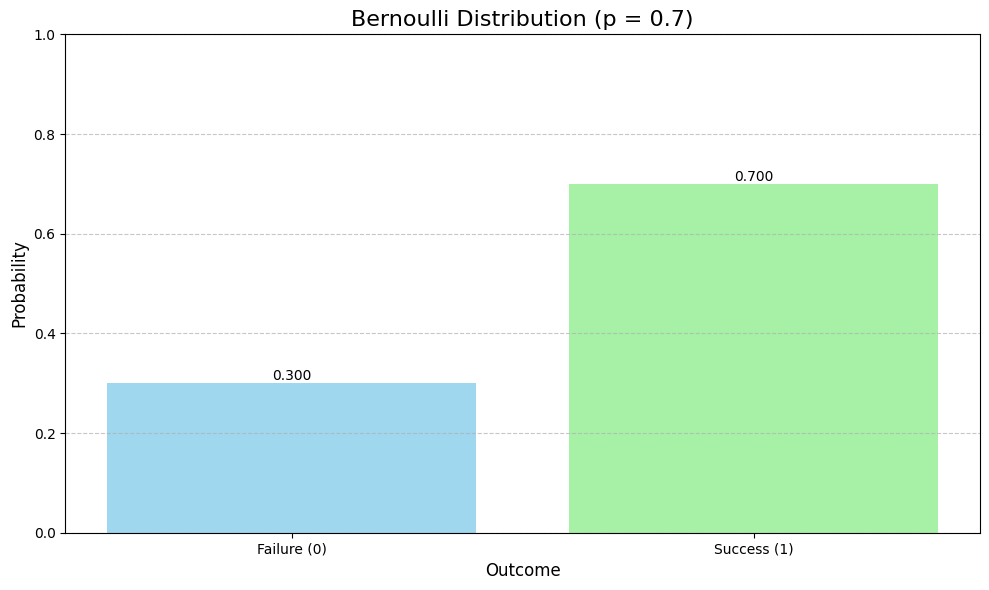

P(X = 0) = 0.300
P(X = 1) = 0.700


In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli

# Set the parameter p (probability of success)
p = 0.7

# Create a Bernoulli distribution
rv = bernoulli(p)

# Calculate probabilities
x = np.array([0, 1])
prob = rv.pmf(x)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Bar plot
ax.bar(x, prob, align='center', alpha=0.8, color=['skyblue', 'lightgreen'])

# Add value labels on top of each bar
for i, v in enumerate(prob):
    ax.text(i, v, f'{v:.3f}', ha='center', va='bottom')

# Customize the plot
ax.set_xlabel('Outcome', fontsize=12)
ax.set_ylabel('Probability', fontsize=12)
ax.set_title(f'Bernoulli Distribution (p = {p})', fontsize=16)
ax.set_xticks([0, 1])
ax.set_xticklabels(['Failure (0)', 'Success (1)'])
ax.set_ylim(0, 1)

# Add a horizontal line at y=0
ax.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)

# Add grid lines
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

# Print the probabilities
print(f"P(X = 0) = {prob[0]:.3f}")
print(f"P(X = 1) = {prob[1]:.3f}")

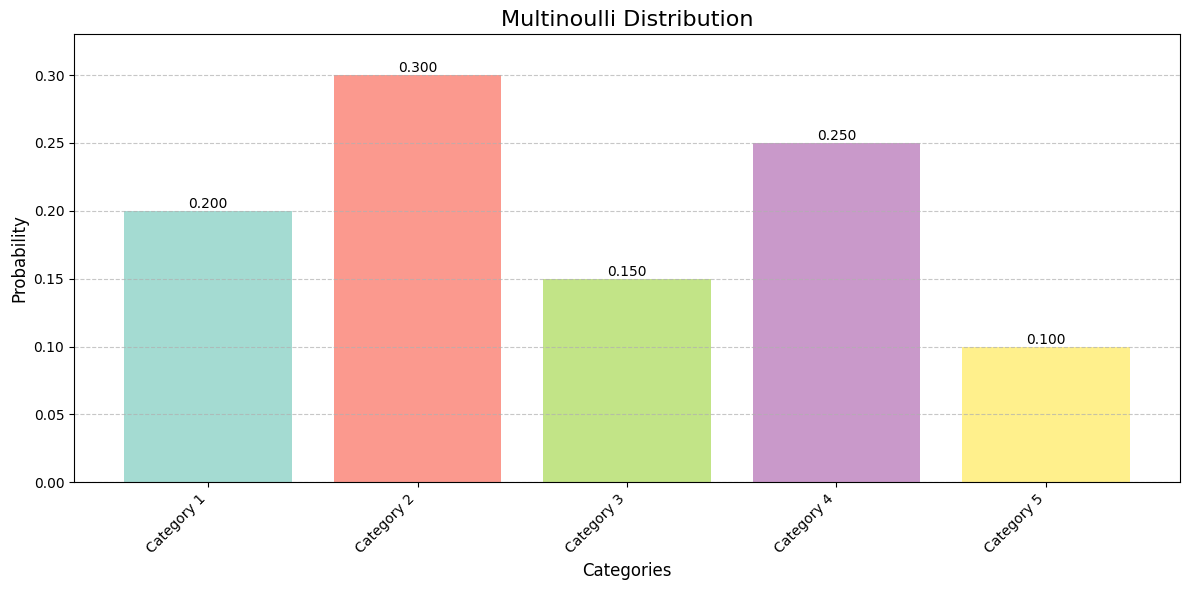

P(Category 1) = 0.200
P(Category 2) = 0.300
P(Category 3) = 0.150
P(Category 4) = 0.250
P(Category 5) = 0.100

Sum of probabilities: 1.000


In [54]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multinomial

# Set the parameters
n = 1  # number of trials (always 1 for Multinoulli)
p = [0.2, 0.3, 0.15, 0.25, 0.1]  # probabilities for each category

# Create a Multinoulli distribution
rv = multinomial(n, p)

# Calculate probabilities
x = np.eye(len(p), dtype=int)
prob = rv.pmf(x)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Bar plot
categories = [f'Category {i+1}' for i in range(len(p))]
ax.bar(categories, prob, align='center', alpha=0.8, color=plt.cm.Set3(np.linspace(0, 1, len(p))))

# Add value labels on top of each bar
for i, v in enumerate(prob):
    ax.text(i, v, f'{v:.3f}', ha='center', va='bottom')

# Customize the plot
ax.set_xlabel('Categories', fontsize=12)
ax.set_ylabel('Probability', fontsize=12)
ax.set_title('Multinoulli Distribution', fontsize=16)
ax.set_ylim(0, max(prob) * 1.1)

# Add a horizontal line at y=0
ax.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)

# Add grid lines
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

# Print the probabilities
for i, (cat, pr) in enumerate(zip(categories, prob)):
    print(f"P({cat}) = {pr:.3f}")

# Verify that probabilities sum to 1
print(f"\nSum of probabilities: {sum(prob):.3f}")

# Gaussian Distribution

The most commonly used distribution over real numbers is the **normal distribution**, also known as the **Gaussain distribution**:

$$ \mathcal{N} (x; \mu, \sigma^2) = \sqrt{\frac{1}{2\pi \sigma^2}} exp(-\frac{1}{2\sigma^2}(x - \mu)^2) $$

When we evaluate the PDF, we need to square and invert $\sigma$. When we need to frequently evaluate the PDF with different parameter values, a more efficient way of parametrizing the distribution is to use a paramter $\beta \in (0, \infty)$ to control the **precision**, or inverse variance, of the distribution.

$$ \mathcal{N} (x; \mu, \beta^{-1}) = \sqrt{\frac{\beta}{2\pi}} exp(-\frac{1}{2}\beta (x - \mu)^2) $$


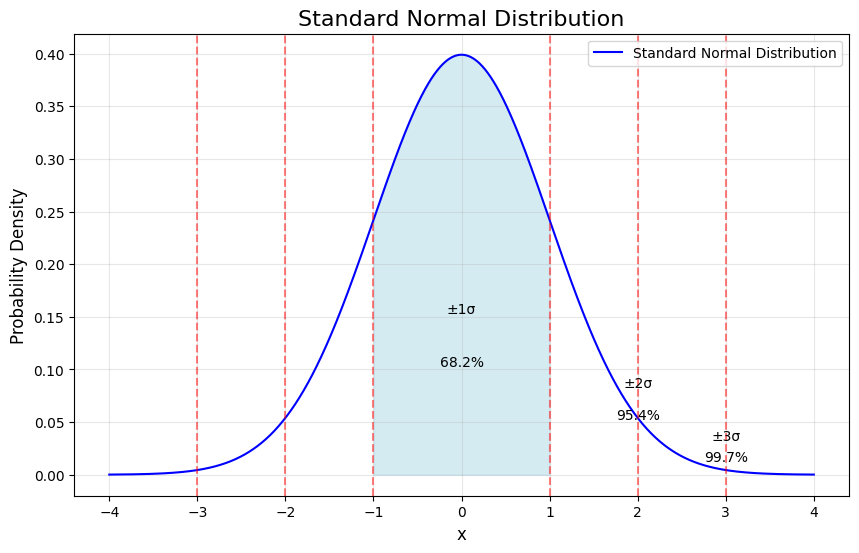

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generate x values
x = np.linspace(-4, 4, 1000)

# Calculate the probability density function
pdf = norm.pdf(x, loc=0, scale=1)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, 'b-', label='Standard Normal Distribution')
plt.fill_between(x, pdf, where=(x>=-1) & (x<=1), color='lightblue', alpha=0.5)

# Add labels and title
plt.title('Standard Normal Distribution', fontsize=16)
plt.xlabel('x', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)

# Add vertical lines for standard deviations
for i in range(1, 4):
    plt.axvline(i, color='r', linestyle='--', alpha=0.5)
    plt.axvline(-i, color='r', linestyle='--', alpha=0.5)

# Add legend
plt.legend()

# Add text annotations
plt.text(0, 0.1, '68.2%', ha='center', va='bottom')
plt.text(0, 0.15, '±1σ', ha='center', va='bottom')
plt.text(2, 0.05, '95.4%', ha='center', va='bottom')
plt.text(2, 0.08, '±2σ', ha='center', va='bottom')
plt.text(3, 0.01, '99.7%', ha='center', va='bottom')
plt.text(3, 0.03, '±3σ', ha='center', va='bottom')

# Show grid
plt.grid(True, alpha=0.3)

# Show plot
plt.show()

The normal distribution generalizes to $ \mathbb{R}^n $, in which case it is known as the **multivariate normal distribution**. It may be parametrized with a positive definite symmetric matrix $\Sigma$:

$$
  \mathcal{N}(x;\mu,\Sigma) = \sqrt{\frac{1}{(2\pi)^n det(\Sigma)}} exp( - \frac{1}{2}(x - \mu)^T \Sigma^{-1} (x - \mu))
$$

As in the univariate case, when we wish to evaluate the PDF several times for many different values of the parameters, the covariance is not a computationally efficient way to parametrize the distribution, since we need to invert $\Sigma$ to evaluate the PDF. We can instead use a **precision matrix** $\beta$.

$$
  \mathcal{N}(x;\mu,\Sigma) = \sqrt{\frac{det(\beta)}{(2\pi)^n}} exp( - \frac{1}{2}(x - \mu)^T \beta (x - \mu))
$$

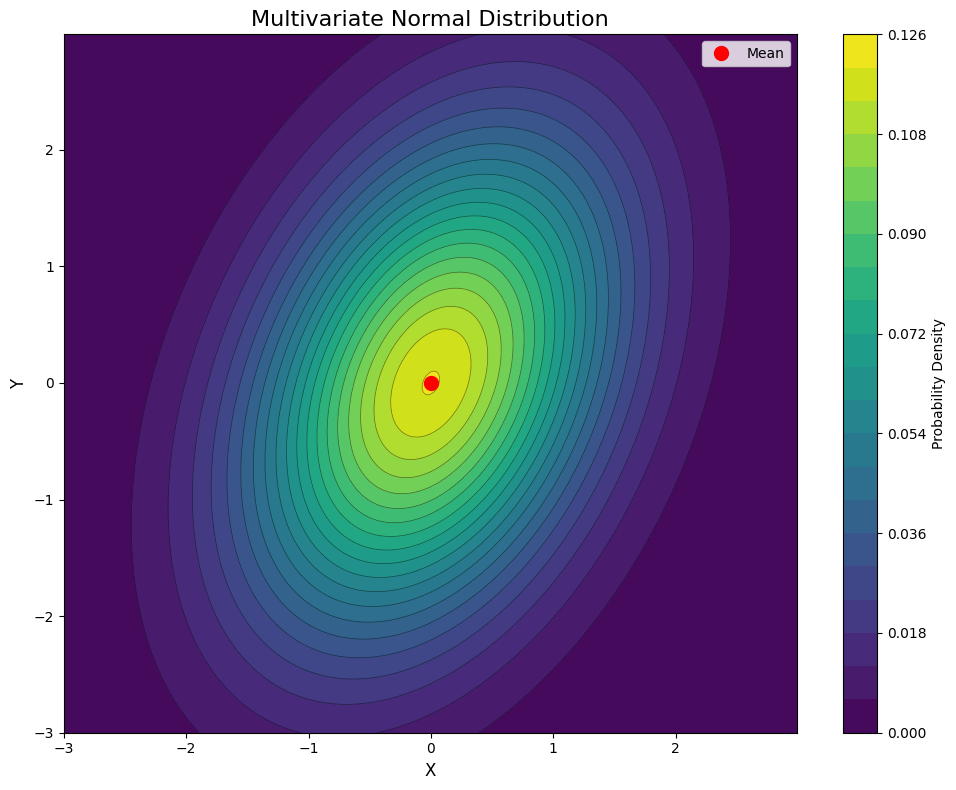

Mean: [0, 0]
Covariance Matrix:
[[1, 0.5], [0.5, 2]]


In [52]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Set up the parameters
mean = [0, 0]
cov = [[1, 0.5], [0.5, 2]]  # Covariance matrix

# Create a grid of points
x, y = np.mgrid[-3:3:.01, -3:3:.01]
pos = np.dstack((x, y))

# Create the multivariate normal distribution
rv = multivariate_normal(mean, cov)

# Calculate the probability density function
z = rv.pdf(pos)

# Plot the distribution
fig, ax = plt.subplots(figsize=(10, 8))

# Contour plot
contour = ax.contourf(x, y, z, levels=20, cmap='viridis')
ax.contour(x, y, z, levels=20, colors='k', linewidths=0.5, alpha=0.5)

# Add a colorbar
plt.colorbar(contour, label='Probability Density')

# Plot the mean point
ax.plot(mean[0], mean[1], 'ro', markersize=10, label='Mean')

# Add labels and title
ax.set_xlabel('X', fontsize=12)
ax.set_ylabel('Y', fontsize=12)
ax.set_title('Multivariate Normal Distribution', fontsize=16)

# Add legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

# Print the parameters
print(f"Mean: {mean}")
print(f"Covariance Matrix:\n{cov}")

We often fix the covariance matrix to be a diagonal matrix. An even simpler version is the **isotropic** Gaussian distribution, whose covariance matrix is a scalar times the identity matrix.

$$
  \Sigma = \sigma^2 I
$$

In [60]:
scalar = np.array([1,30])
I = np.eye(2)
print(scalar * I)

[[ 1.  0.]
 [ 0. 30.]]


# Exponential and Laplace Distributions

In the context of deep learning, we often want to have a probability distribution with a sharp point as $x = 0$. To accomplish this, we can use the **exponential distribution**.

$$
  P(x;\lambda) = \lambda 1_{x \le 0} exp(- \lambda x)
$$

The exponential distribution uses the indicator function $ 1_{x \le 0}$ to assign probability zero to all negative values of $x$.

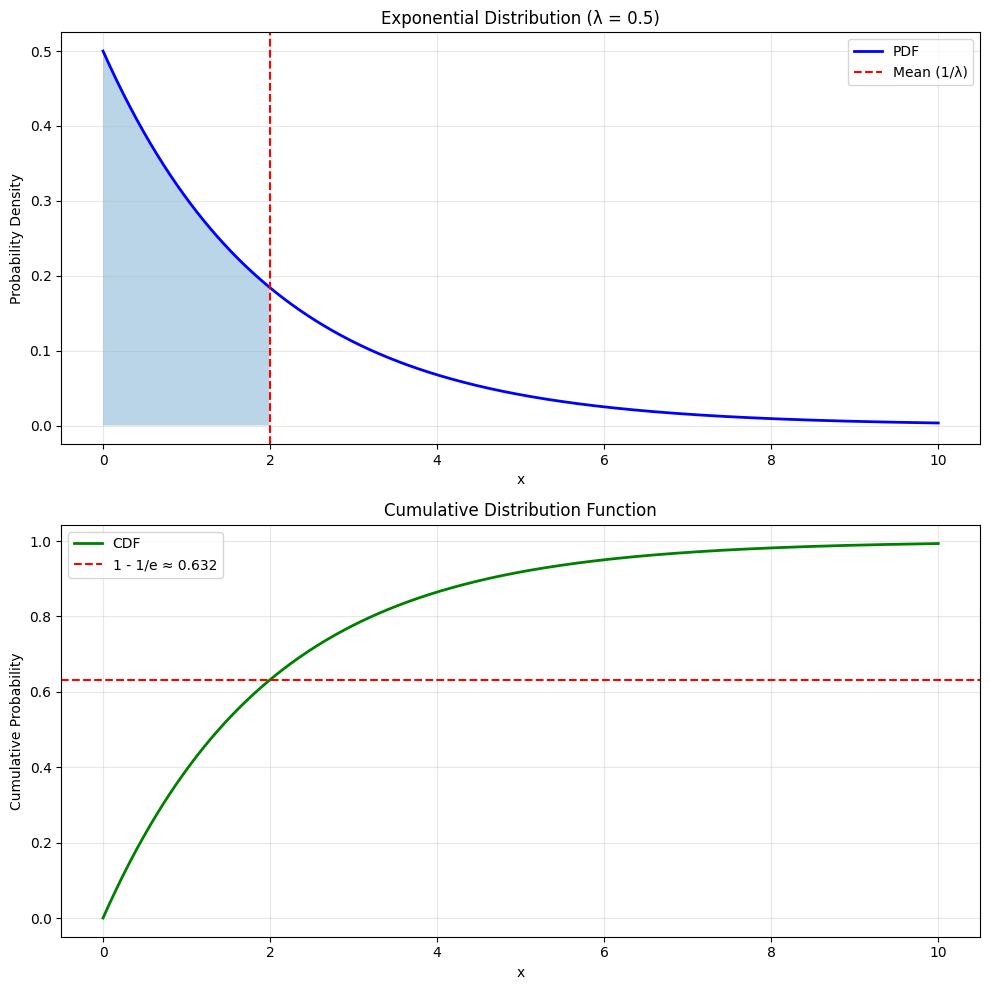

Mean (1/λ): 2.0
Variance: 4.0
P(X ≤ Mean): 0.632


In [55]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

# Set the parameter
lambda_param = 0.5  # rate parameter

# Create an exponential distribution
rv = expon(scale=1/lambda_param)

# Generate x values
x = np.linspace(0, 10, 1000)

# Calculate the probability density function (PDF)
pdf = rv.pdf(x)

# Calculate the cumulative distribution function (CDF)
cdf = rv.cdf(x)

# Create the plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Plot PDF
ax1.plot(x, pdf, 'b-', lw=2, label='PDF')
ax1.fill_between(x, pdf, where=(x <= 1/lambda_param), alpha=0.3)
ax1.axvline(1/lambda_param, color='r', linestyle='--', label='Mean (1/λ)')
ax1.set_xlabel('x')
ax1.set_ylabel('Probability Density')
ax1.set_title(f'Exponential Distribution (λ = {lambda_param})')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot CDF
ax2.plot(x, cdf, 'g-', lw=2, label='CDF')
ax2.axhline(1 - np.exp(-1), color='r', linestyle='--', label='1 - 1/e ≈ 0.632')
ax2.set_xlabel('x')
ax2.set_ylabel('Cumulative Probability')
ax2.set_title('Cumulative Distribution Function')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print some properties
print(f"Mean (1/λ): {1/lambda_param}")
print(f"Variance: {1/lambda_param**2}")
print(f"P(X ≤ Mean): {1 - np.exp(-1):.3f}")

A closely realted probability distribution that allows us to place a sharp peak of probability mass at an arbitrary point $\mu$ is the **Laplace distribution**.

$$
  Laplace(x;\mu,\gamma) = \frac{1}{2\gamma} exp( - \frac{|x - \mu|}{\gamma} )
$$

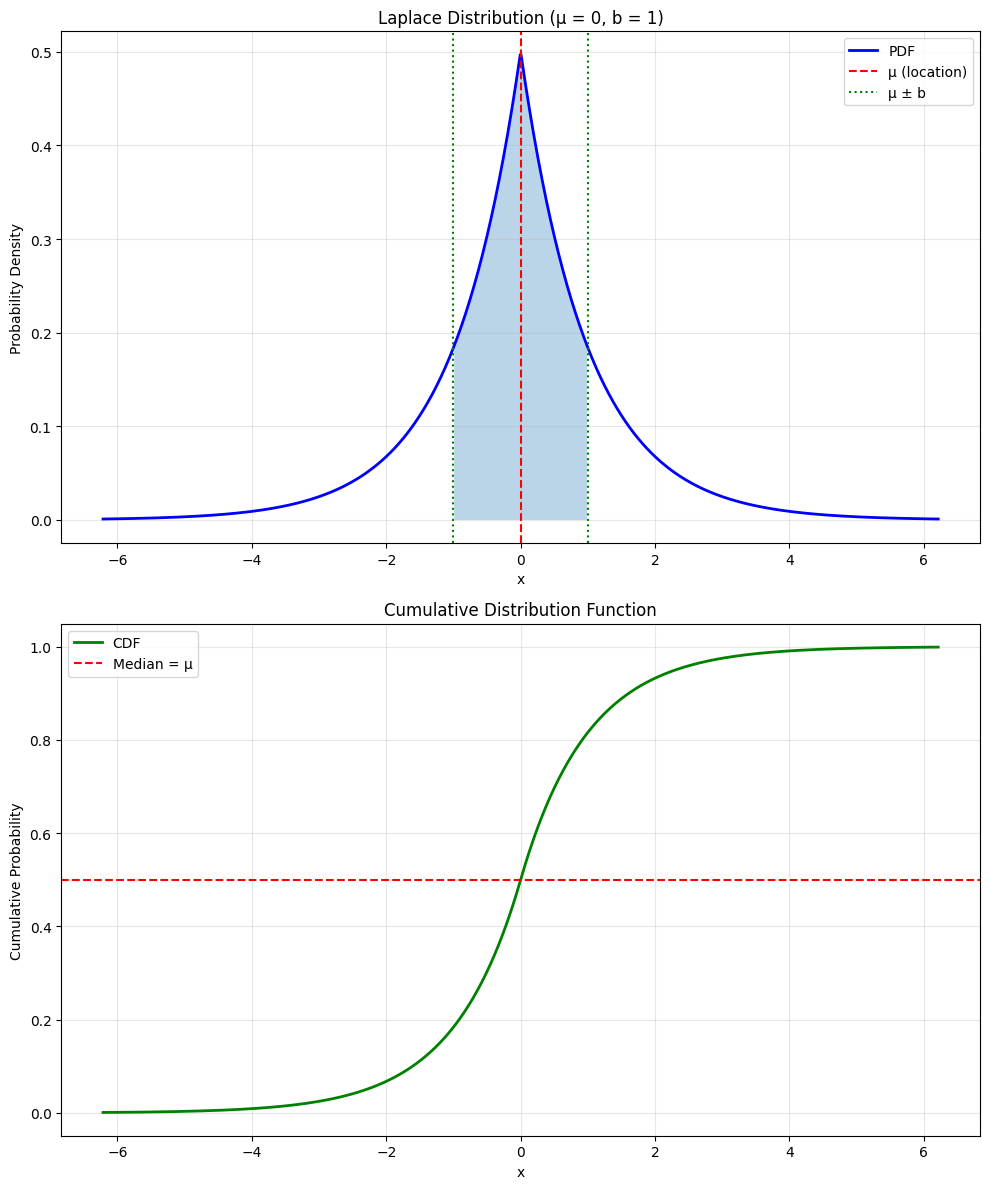

Mean (μ): 0.0
Median: 0.0
Variance: 2.0
P(|X - μ| ≤ b): 0.632


In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import laplace

# Set the parameters
loc = 0  # location parameter (μ)
scale = 1  # scale parameter (b)

# Create a Laplace distribution
rv = laplace(loc, scale)

# Generate x values
x = np.linspace(rv.ppf(0.001), rv.ppf(0.999), 1000)

# Calculate the probability density function (PDF)
pdf = rv.pdf(x)

# Calculate the cumulative distribution function (CDF)
cdf = rv.cdf(x)

# Create the plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Plot PDF
ax1.plot(x, pdf, 'b-', lw=2, label='PDF')
ax1.fill_between(x, pdf, where=((x >= loc-scale) & (x <= loc+scale)), alpha=0.3)
ax1.axvline(loc, color='r', linestyle='--', label='μ (location)')
ax1.axvline(loc-scale, color='g', linestyle=':', label='μ ± b')
ax1.axvline(loc+scale, color='g', linestyle=':')
ax1.set_xlabel('x')
ax1.set_ylabel('Probability Density')
ax1.set_title(f'Laplace Distribution (μ = {loc}, b = {scale})')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot CDF
ax2.plot(x, cdf, 'g-', lw=2, label='CDF')
ax2.axhline(0.5, color='r', linestyle='--', label='Median = μ')
ax2.set_xlabel('x')
ax2.set_ylabel('Cumulative Probability')
ax2.set_title('Cumulative Distribution Function')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print some properties
print(f"Mean (μ): {rv.mean()}")
print(f"Median: {rv.median()}")
print(f"Variance: {rv.var()}")
print(f"P(|X - μ| ≤ b): {rv.cdf(loc + scale) - rv.cdf(loc - scale):.3f}")

# The Dirac Distribution and Empirical Distribution

In some cases we weight to specify that all the mass in a probability distribution clusters around a single point. THis can be accomplished by defining a PDF using the **Dirac detla function** $\delta$:

$$
  p(x) = \delta (x - \mu)
$$

A common use of the Dirac delta distribution is as a component of an **empirical distribution**

$$
  \hat{p} = \frac{1}{m} \sum_{i=1}^{m} \delta(x - x^{(i)})
$$

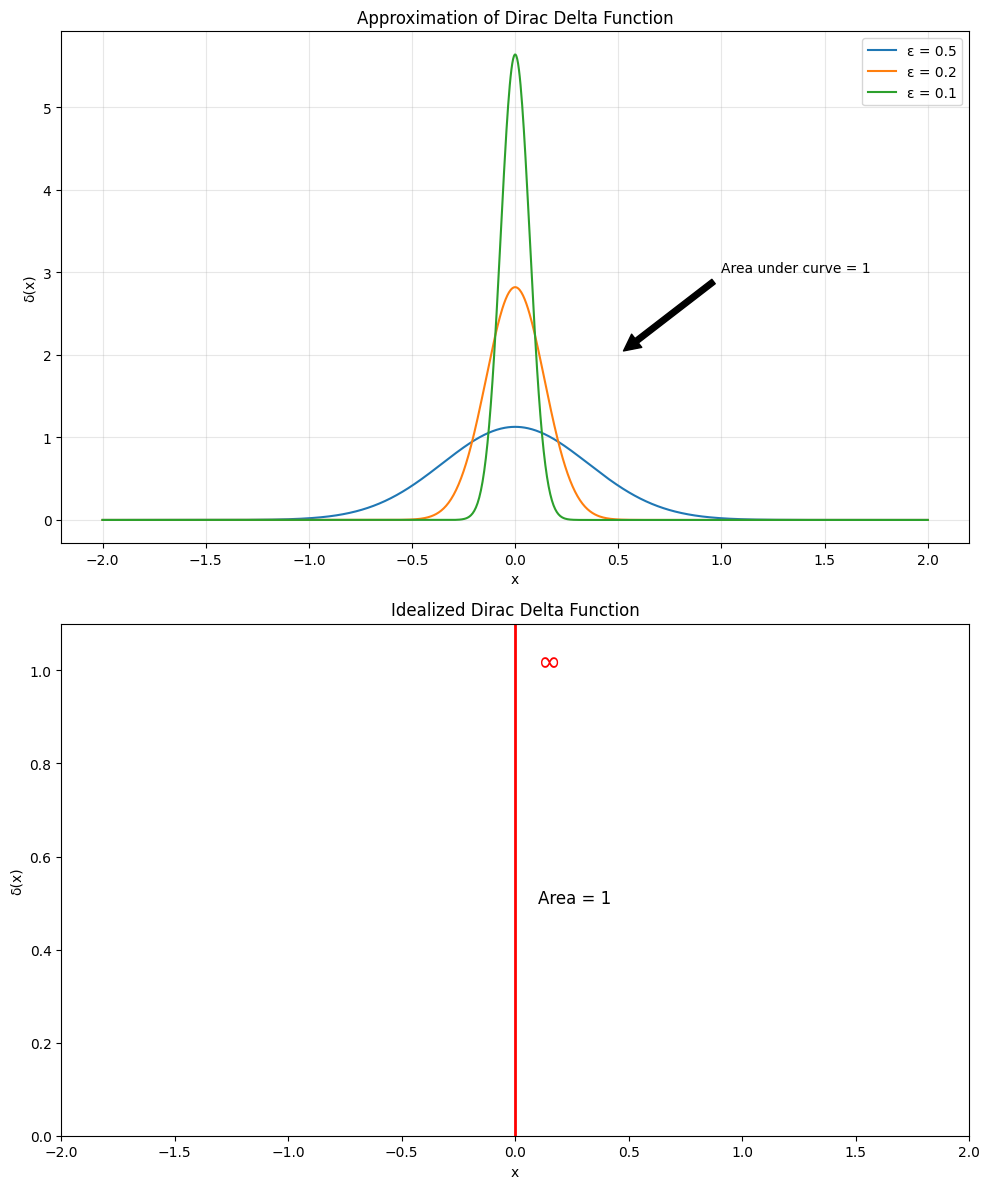

Key properties of the Dirac delta function:
1. δ(x) = 0 for all x ≠ 0
2. ∫δ(x)dx = 1 over any interval containing x = 0
3. ∫f(x)δ(x)dx = f(0) for any continuous function f(x)


In [57]:
import numpy as np
import matplotlib.pyplot as plt

def dirac_delta_approx(x, epsilon=0.1):
    return 1 / (epsilon * np.sqrt(np.pi)) * np.exp(-(x/epsilon)**2)

# Generate x values
x = np.linspace(-2, 2, 1000)

# Create the plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Plot approximation of Dirac delta
for epsilon in [0.5, 0.2, 0.1]:
    y = dirac_delta_approx(x, epsilon)
    ax1.plot(x, y, label=f'ε = {epsilon}')

ax1.set_xlabel('x')
ax1.set_ylabel('δ(x)')
ax1.set_title('Approximation of Dirac Delta Function')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Highlight key properties
ax1.annotate('Area under curve = 1', xy=(0.5, 2), xytext=(1, 3),
             arrowprops=dict(facecolor='black', shrink=0.05))

# Plot "ideal" Dirac delta
ax2.set_xlim(-2, 2)
ax2.set_ylim(0, 1.1)
ax2.axvline(0, color='r', lw=2)
ax2.axhline(0, color='k', lw=0.5)
ax2.set_xlabel('x')
ax2.set_ylabel('δ(x)')
ax2.set_title('Idealized Dirac Delta Function')
ax2.text(0.1, 1, '∞', fontsize=20, color='r')
ax2.text(0.1, 0.5, 'Area = 1', fontsize=12)

plt.tight_layout()
plt.show()

# Print key properties
print("Key properties of the Dirac delta function:")
print("1. δ(x) = 0 for all x ≠ 0")
print("2. ∫δ(x)dx = 1 over any interval containing x = 0")
print("3. ∫f(x)δ(x)dx = f(0) for any continuous function f(x)")

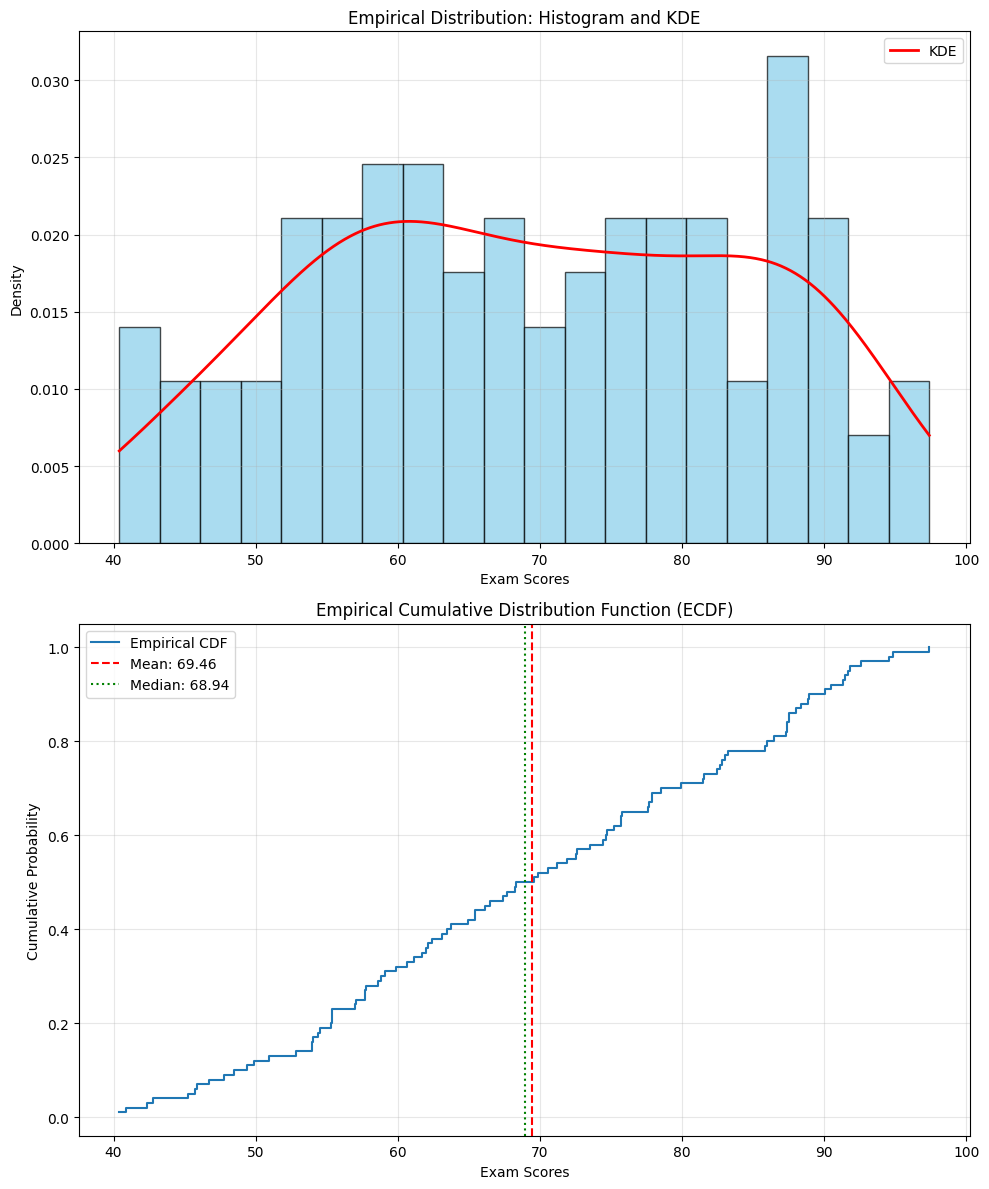

Mean: 69.46
Median: 68.94
Standard Deviation: 15.02
25th Percentile: 57.51
75th Percentile: 82.71


In [59]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Generate some sample data (let's say it's exam scores)
np.random.seed(42)
data = np.concatenate([
    np.random.normal(60, 10, 50),  # some students scoring around 60
    np.random.normal(75, 8, 30),   # some students scoring around 75
    np.random.normal(90, 5, 20)    # some high performers
])

# Sort the data
sorted_data = np.sort(data)

# Calculate the empirical cumulative distribution function (ECDF)
ecdf = np.arange(1, len(data) + 1) / len(data)

# Create the plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Plot the histogram and KDE
ax1.hist(data, bins=20, density=True, alpha=0.7, color='skyblue', edgecolor='black')
kde = stats.gaussian_kde(data)
xx = np.linspace(data.min(), data.max(), 1000)
ax1.plot(xx, kde(xx), 'r-', lw=2, label='KDE')
ax1.set_xlabel('Exam Scores')
ax1.set_ylabel('Density')
ax1.set_title('Empirical Distribution: Histogram and KDE')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot the empirical CDF
ax2.step(sorted_data, ecdf, where='post', label='Empirical CDF')
ax2.set_xlabel('Exam Scores')
ax2.set_ylabel('Cumulative Probability')
ax2.set_title('Empirical Cumulative Distribution Function (ECDF)')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Add some statistics
mean = np.mean(data)
median = np.median(data)
ax2.axvline(mean, color='r', linestyle='--', label=f'Mean: {mean:.2f}')
ax2.axvline(median, color='g', linestyle=':', label=f'Median: {median:.2f}')
ax2.legend()

plt.tight_layout()
plt.show()

# Print some summary statistics
print(f"Mean: {mean:.2f}")
print(f"Median: {median:.2f}")
print(f"Standard Deviation: {np.std(data):.2f}")
print(f"25th Percentile: {np.percentile(data, 25):.2f}")
print(f"75th Percentile: {np.percentile(data, 75):.2f}")

For discrete variables, the situation is simpler, an empircal distribution can be conceptualized as a multinoulli distribution, with a probability associated with each possible value that is simply equal to the **empircal frequency** of that value in the training set.

Empirical Frequencies:
A: 0.421
D: 0.100
C: 0.188
B: 0.291


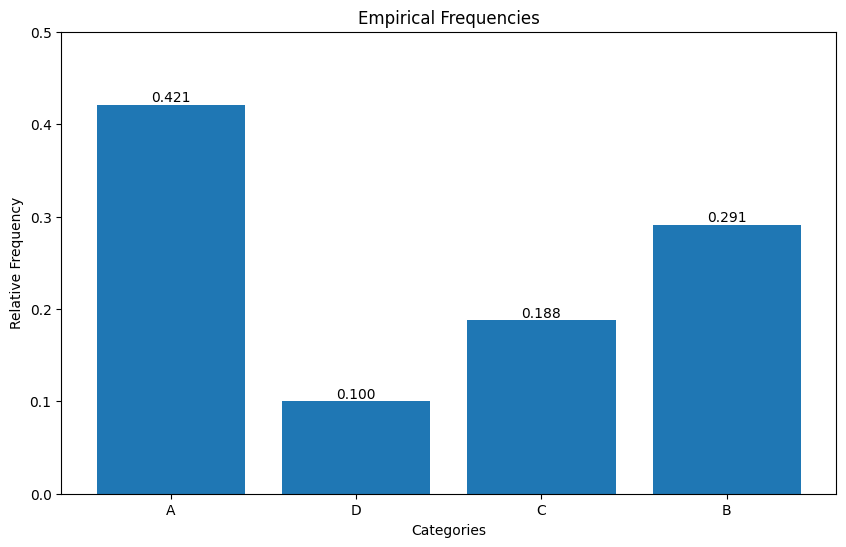

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Generate some sample data
np.random.seed(42)
data = np.random.choice(['A', 'B', 'C', 'D'], size=1000, p=[0.4, 0.3, 0.2, 0.1])

# Calculate empirical frequencies
freq = Counter(data)
total = len(data)
empirical_freq = {k: v / total for k, v in freq.items()}

# Print results
print("Empirical Frequencies:")
for k, v in empirical_freq.items():
    print(f"{k}: {v:.3f}")

# Visualize
plt.figure(figsize=(10, 6))
plt.bar(empirical_freq.keys(), empirical_freq.values())
plt.title('Empirical Frequencies')
plt.xlabel('Categories')
plt.ylabel('Relative Frequency')
plt.ylim(0, 0.5)
for k, v in empirical_freq.items():
    plt.text(k, v, f'{v:.3f}', ha='center', va='bottom')
plt.show()

# Mixtures of distributions

It is also common to define probability distributions by combining other simpler probability distributions. One common way of combining distributions is to construct a **mixture distribution**. A mixture distribution is made up of severl component distributions. On each trial, the choice of which component distribution should generate the sample is determined by samlping a component identity from a  multinoulli distribution:

$$
  P (\texttt{x}) = \sum_i P(c=i) P (x | c = i)
$$

where $P(c)$ is the multinoulli distribution over component identities.

We have already seen one example of a mixture distribution: the empical distribution over real-values variables is a mixture distribution with one Dirac component for each training example.

A **latent variable** is a random variable that we cannot observe directly. The component identify of variable c of the mixture model provides an example. LAtent variable may be related to $\texttt{x}$ through the joint distribution, in this case $P\texttt{x},c) = P (\texttt{x}|c) P (c)$. The dstribution $P(c)$ over the latent variable and the distribution $P(x|c)$ relating the latent variables to the visible variables determines the shape of the distribution $P(\texttt{x})$.

## Prior and Posterior

**prior** probability, the model's beliefs about $c$ before it has observed $\texttt{x}$.

**posterior** probability, $P (c | \texttt{x})$, becuase it is computed after observation of $\texttt{x}$.

## Gaussian mixture model

A very powerful and common type of mixture model is the Gaussian mixture model, in which the components $p(\texttt{x} | c = i)$ are Gaussians.

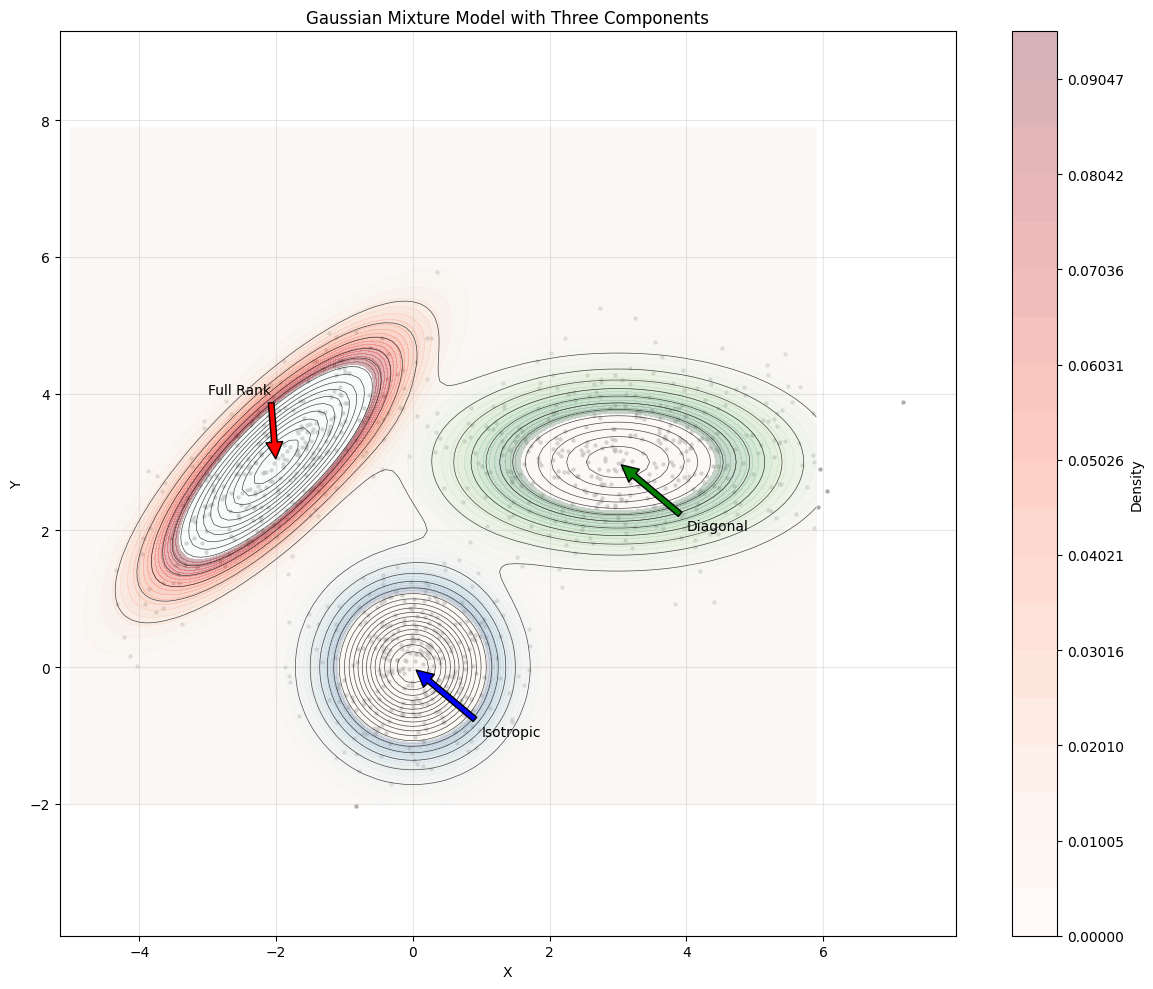

Component 1 (Isotropic):
Mean: [0 0]
Covariance:
[[0.5 0. ]
 [0.  0.5]]

Component 2 (Diagonal):
Mean: [3 3]
Covariance:
[[2.  0. ]
 [0.  0.5]]

Component 3 (Full Rank):
Mean: [-2  3]
Covariance:
[[1.  0.8]
 [0.8 1. ]]

Mixing Coefficients: [0.3 0.4 0.3]


In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Set random seed for reproducibility
np.random.seed(42)

# Define the mixture components
n_components = 3
n_samples = 1000

# Component 1: Isotropic Gaussian
mean1 = np.array([0, 0])
cov1 = np.eye(2) * 0.5  # Isotropic covariance

# Component 2: Diagonal covariance
mean2 = np.array([3, 3])
cov2 = np.diag([2, 0.5])  # Diagonal covariance

# Component 3: Full rank covariance
mean3 = np.array([-2, 3])
cov3 = np.array([[1, 0.8], [0.8, 1]])  # Full covariance

# Mixing coefficients
pi = np.array([0.3, 0.4, 0.3])

# Generate samples
z = np.random.choice(3, size=n_samples, p=pi)
samples = np.zeros((n_samples, 2))
for i in range(n_samples):
    if z[i] == 0:
        samples[i] = np.random.multivariate_normal(mean1, cov1)
    elif z[i] == 1:
        samples[i] = np.random.multivariate_normal(mean2, cov2)
    else:
        samples[i] = np.random.multivariate_normal(mean3, cov3)

# Create a grid for contour plotting
x, y = np.mgrid[-5:6:.1, -2:8:.1]
pos = np.dstack((x, y))

# Calculate the density for each component
z1 = multivariate_normal(mean1, cov1).pdf(pos)
z2 = multivariate_normal(mean2, cov2).pdf(pos)
z3 = multivariate_normal(mean3, cov3).pdf(pos)

# Calculate the total density
z_total = pi[0]*z1 + pi[1]*z2 + pi[2]*z3

# Plotting
plt.figure(figsize=(12, 10))

# Plot the samples
plt.scatter(samples[:, 0], samples[:, 1], c='grey', alpha=0.5, s=5)

# Plot the contours
levels = np.linspace(0, z_total.max(), 20)
plt.contour(x, y, z_total, levels=levels, colors='k', linewidths=0.5, alpha=0.7)

# Plot filled contours for each component
plt.contourf(x, y, z1, levels=levels, cmap='Blues', alpha=0.3)
plt.contourf(x, y, z2, levels=levels, cmap='Greens', alpha=0.3)
plt.contourf(x, y, z3, levels=levels, cmap='Reds', alpha=0.3)

# Annotate the components
plt.annotate('Isotropic', xy=(mean1[0], mean1[1]), xytext=(1, -1),
             arrowprops=dict(facecolor='blue', shrink=0.05))
plt.annotate('Diagonal', xy=(mean2[0], mean2[1]), xytext=(4, 2),
             arrowprops=dict(facecolor='green', shrink=0.05))
plt.annotate('Full Rank', xy=(mean3[0], mean3[1]), xytext=(-3, 4),
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.title('Gaussian Mixture Model with Three Components')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.grid(True, alpha=0.3)
plt.colorbar(label='Density')

plt.tight_layout()
plt.show()

# Print component parameters
print("Component 1 (Isotropic):")
print(f"Mean: {mean1}")
print(f"Covariance:\n{cov1}\n")

print("Component 2 (Diagonal):")
print(f"Mean: {mean2}")
print(f"Covariance:\n{cov2}\n")

print("Component 3 (Full Rank):")
print(f"Mean: {mean3}")
print(f"Covariance:\n{cov3}\n")

print(f"Mixing Coefficients: {pi}")

# Full rank matrix

## Covariance Matrix:

In a multivariate Gaussian distribution, the covariance matrix describes the shape and orientation of the distribution.
For a d-dimensional Gaussian, the covariance matrix is a d×d symmetric, positive semi-definite matrix.


## Rank of a Matrix:

The rank of a matrix is the number of linearly independent rows or columns in the matrix.
For a d×d matrix, the maximum possible rank is d.


## Full Rank:

A covariance matrix is considered "full rank" if its rank equals its dimension.
For a 2D Gaussian, a full rank covariance matrix has rank 2.


## Implications of Full Rank:

Full rank means the Gaussian distribution can extend in all dimensions of the space.
It allows for any possible correlation structure between the variables.
The determinant of a full rank covariance matrix is non-zero.


## Non-Full Rank (Degenerate) Covariance:

If the covariance matrix is not full rank, it's called degenerate.
This means the distribution is confined to a lower-dimensional subspace.
The determinant of a non-full rank covariance matrix is zero.


## Visualization:

In the plot, the full rank Gaussian can take any elliptical shape.
The non-full rank Gaussian is confined to a line, as it can't extend in all directions.


## Mathematical Properties:

For a full rank covariance matrix, the probability density function (PDF) of the Gaussian is well-defined everywhere.
For a non-full rank covariance, the PDF is not defined in the standard form, as it involves dividing by the determinant, which is zero.

## Practical Implications:

Full rank covariances are more flexible and can model a wider range of data distributions.
Non-full rank covariances might indicate perfect correlations or redundancies in your data.

In the example code, you can see that:

The full rank covariance matrix has a non-zero determinant and rank equal to its dimension.
The non-full rank covariance matrix has a zero determinant and rank less than its dimension.

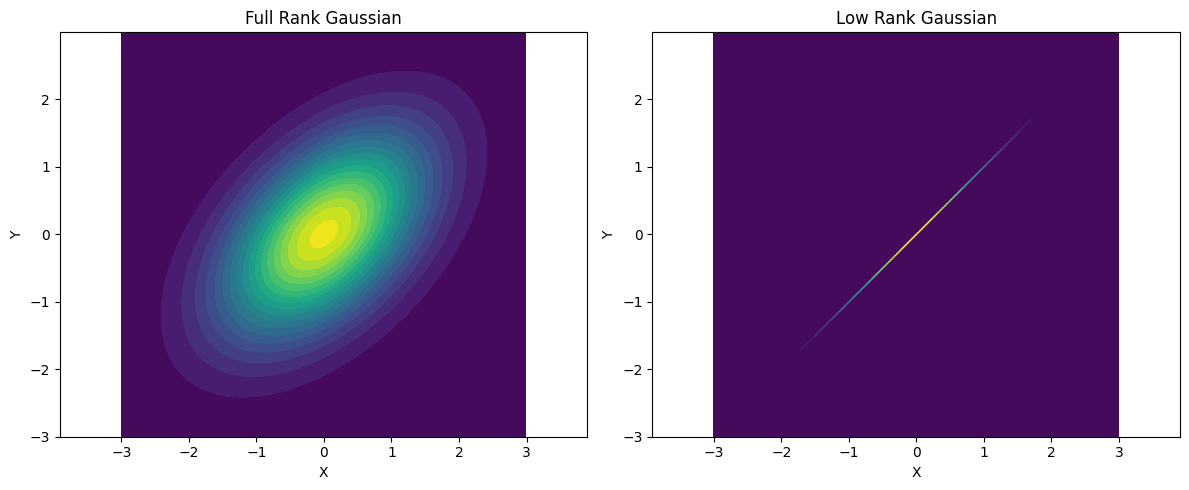

Full Rank Covariance Matrix:
[[1.  0.5]
 [0.5 1. ]]
Rank: 2
Determinant: 0.75

Low Rank Covariance Matrix:
[[0.5000005 0.4999995]
 [0.4999995 0.5000005]]
Rank: 1
Determinant: 9.99999999994366e-07

Eigenvalues of Low Rank Matrix:
[1.e+00 1.e-06]


In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

def plot_gaussian(ax, mean, cov, title):
    x, y = np.mgrid[-3:3:.01, -3:3:.01]
    pos = np.dstack((x, y))
    rv = multivariate_normal(mean, cov, allow_singular=True)
    ax.contourf(x, y, rv.pdf(pos), levels=20, cmap='viridis')
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.axis('equal')

# Set up the plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Full rank covariance matrix
mean_full = [0, 0]
cov_full = [[1, 0.5], [0.5, 1]]
plot_gaussian(ax1, mean_full, cov_full, "Full Rank Gaussian")

# Low rank (nearly degenerate) covariance matrix
mean_low = [0, 0]
eigenvalues = [1, 1e-6]  # One very small eigenvalue
eigenvectors = [[np.cos(np.pi/4), -np.sin(np.pi/4)], [np.sin(np.pi/4), np.cos(np.pi/4)]]
cov_low = np.dot(np.dot(eigenvectors, np.diag(eigenvalues)), np.array(eigenvectors).T)
plot_gaussian(ax2, mean_low, cov_low, "Low Rank Gaussian")

plt.tight_layout()
plt.show()

print("Full Rank Covariance Matrix:")
print(np.array(cov_full))
print(f"Rank: {np.linalg.matrix_rank(cov_full)}")
print(f"Determinant: {np.linalg.det(cov_full)}")

print("\nLow Rank Covariance Matrix:")
print(cov_low)
print(f"Rank: {np.linalg.matrix_rank(cov_low, tol=1e-5)}")
print(f"Determinant: {np.linalg.det(cov_low)}")

print("\nEigenvalues of Low Rank Matrix:")
print(np.linalg.eigvals(cov_low))

# Useful Properties and Common functions

## Logistic Sigmoid

The logistic sigmoid:

$$ \sigma(x) = \frac{1}{1 + exp(-x)} $$

The sigmoid function **saturates** when its argument is very positive or very negative, meaning that thef function becomes very flat and insensitive to small changes in the input/

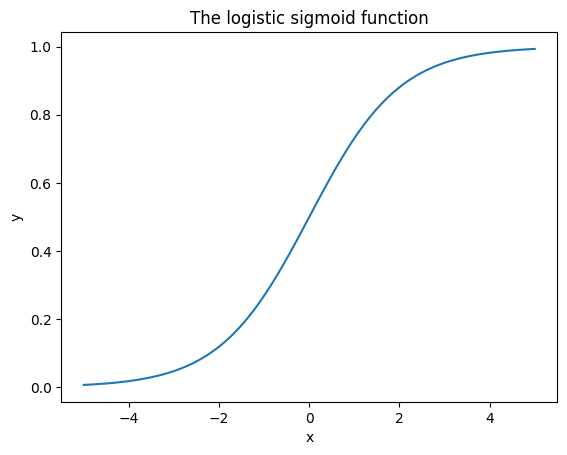

In [71]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Plot the sigmoid function.
x = np.linspace(-5, 5, 100)
y = sigmoid(x)
plt.title("The logistic sigmoid function")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x, y)
plt.show()

## Softplus function

The softplus function can be useful for producing the $\beta$ or $\sigma$ parameter of a normal distribution because its range is $(0,\infty)$. It also arises commonly when manipulating expressions involving sigmoids. The name softplus function comes from the fact it is a smoother, or "softened" version of:

$$
  x^+ = max(0,x)
$$

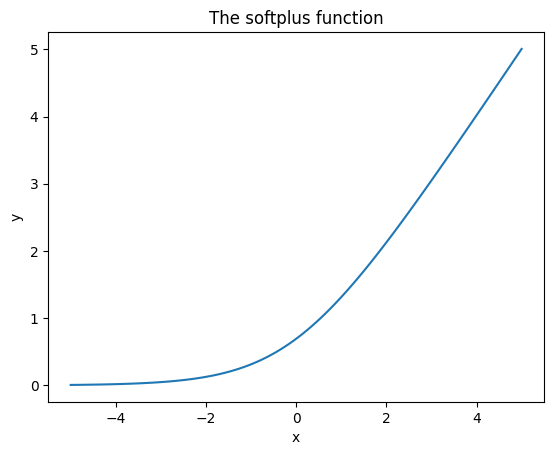

In [75]:
def softplus(x, beta=1):
    """ Source: https://pytorch.org/docs/stable/generated/torch.nn.Softplus.html"""
    return (1/beta) * np.log(1 + np.exp(beta*x))

# Plot the sigmoid function.
x = np.linspace(-5, 5, 100)
y = softplus(x)
plt.title("The softplus function")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x, y)
plt.show()

# Bayes

If we know $P(\texttt{y} | \texttt{x})$ and need to know $P(\texttt{x} | \texttt{y}$, we can compute the desired quantity using **Bayes' rule**:

$$
  P (\texttt{x} | \texttt{y}) = \frac{P(\texttt{x}) P(\texttt{y} | \texttt{x})}{P(\texttt{y})}
$$

Note that $P(\texttt{y})$ appears in the formula, it is usually feasible to compute $P(\texttt{y}) = \sum_x P(y|x)P(x)$, so we do not need to begin with knowledge of $P(\text{y})$.

In [78]:
# Bayes Rule

# P(A|B) = P(B|A) * P(A) / P(B)
P_x, P_y_given_x, P_y = 0.3, 0.8, 0.5
P_x_given_y = (P_x * P_y_given_x) / P_y

print(f"P(A|B) = {P_x_given_y:.4f}")

P(A|B) = 0.4800


# Technical details of Continious Variables

Measure theory provides a rigorous way of describing that a set of points is neglibly small. Such a set is said to have **measure zero**.  A set of measure zero occupies no volume in the sapce we are measing. For example, within $\mathbb{R}^2$, a line has measure zero, while a filled plygon has positive measure. Likewise an individual point has measure zero.

A property that holds **almost everywhere** holds throughout all space except for on a set of measure zero. Because the exceptions occupy a neglible amount of space, they can safely be ignored for many applications.

## A simple example

Suppose we have two random variables $\texttt{x}$ and $\texttt{y}$ where $y=g(x)$, where $g$ is inverible, continious, differentiable transformation. One might expect $p_y(y) = p_x(g^{-1}(y))$. This is not the case

Suppose $\texttt{y} = \frac{\texttt{x}}{2}$, and $ \texttt{x} \sim U(0,1)$. If we use the rule $p_y(y) = p_x(2y)$ then $p_y$ will be 0 everywhere except the interval $[0,\frac{1}{2}]$, and it will be 1 on this interval. THis means:

$$
  \int p_y(y) dy = \frac{1}{2}
$$

which violates the definition of a probability distribution. Remember $\int p(y)dy=1$ . The integral of a PDF must integrate to 1.

The problem with this approach is it fails to account for the distortion of space introduced by the function $g$.

Recall that the probability of $x$ lying in an infinitesimally small region with volume $\delta x$ is given by $p(x)\delta x$. Since $g$ can expand or contract space, the ifinitesimal volume surroudning $x$ in $x$ space may have different volume in $y$ space.

To correctly solve the problem we return to the scalar case. We need to preserve this property.

$$
  | p_y(g(x))dy| = |p_x(x)dx| \\
  p_y(y) = p_x(g^{-1}(y)) |\frac{\partial x}{\partial y}| \\
  p_x(x) = p_y(g(x)) | \frac{\partial g(x)}{\partial x}|
$$

In higher dimensions the dervitive generlizes to be the determinant of the **Jacobian matrix**, the matrix with $J_{i,j} = \frac{\partial x_i}{\partial y_j}$. Thus for real-values vectors x and y,

$$
  p_x(x) = p_y(g(x)) | det ( \frac{\partial g(x)}{\partial x})|
$$

## The Jacobian Matrix

The Jacobian matrix carries all of the partial differential information. The Jacobian matrix is fundamentally what a transformation looks like when you zoom in near a specific point.

The Jacobian matrix
: https://www.youtube.com/watch?v=bohL918kXQk&t=3s

Computing a Jacobian matrix
: https://www.youtube.com/watch?v=CGbBbH1e7Yw

The Jacobian Determinant
: https://www.youtube.com/watch?v=p46QWyHQE6M

In [93]:
import numpy as np
import sympy as sp

# Define symbolic variables
x, y = sp.symbols('x y')

# Define a vector-valued function
f = sp.Matrix([
    x + sp.sin(y),
    y + sp.sin(x)
])

# Calculate the Jacobian matrix
J = f.jacobian(sp.Matrix([x, y]))

print("Symbolic Jacobian matrix:")
print(J)

# Evaluate the Jacobian at a specific point (x=1, y=2)
J_numeric = J.subs([(x, 0), (y, 1)])

print("\nNumeric Jacobian matrix at (x=1, y=2):")
print(np.array(J_numeric).astype(np.float64))

# Compute the determinant of the Jacobian
det_J = J.det()

print("\nDeterminant of the Jacobian:")
print(det_J)

# Evaluate the determinant at a specific point (x=1, y=2)
det_J_numeric = float(det_J.subs([(x, 0), (y, 1)]))

print(f"\nDeterminant evaluated at (x=0, y=1): {det_J_numeric}")

Symbolic Jacobian matrix:
Matrix([[1, cos(y)], [cos(x), 1]])

Numeric Jacobian matrix at (x=1, y=2):
[[1.         0.54030231]
 [1.         1.        ]]

Determinant of the Jacobian:
-cos(x)*cos(y) + 1

Determinant evaluated at (x=0, y=1): 0.4596976941318603


## Determinant

If we think of the matrix $x$ as a linear transformation, that takes the first basis vector to the coordinates $[3,0]$ and the second basis vector to the coordinates $[1,2]$, you can think of the determinant as measuring how much this transformation stretches or squishes space.

In [82]:
x = np.array([[3,0],[1,2]])
np.linalg.det(x)

6.0

## ELI5: Jacobian Matrix
Each box in this chart tells you how sensitive each light is to each knob.

- If a number in the chart is big, it means that light changes a lot when you turn that knob.
- If a number is small, the light doesn't change much when you turn that knob.
- If a number is zero, turning that knob doesn't change that light at all!

The Jacobian matrix is super helpful because:

1. It tells you how everything is connected.
2. It helps predict how the lights will change when you turn the knobs.
3.Scientists and engineers use it to understand complicated systems with lots of "knobs" and "lights".

In grown-up math, the "knobs" are variables, the "lights" are functions, and the changes are called partial derivatives. But the idea is the same – it's all about understanding how things change together!

## ELI5: Partial derivitives

Imagine you have a magic ice cream sundae machine. This machine has two handles:

A chocolate handle
A sprinkle handle

Now, let's say the amount of yumminess of your ice cream sundae depends on how much you turn each handle.
A partial derivative is like asking: "How much does the yumminess change if I turn just one handle a tiny bit, while leaving the other handle alone?"
Let's break it down:

1. Chocolate Handle Partial Derivative:
  - You turn the chocolate handle just a little bit.
  - You don't touch the sprinkle handle at all.
  - You see how much the yumminess changes.
  - This change in yumminess is the partial derivative for the chocolate handle.

2. Sprinkle Handle Partial Derivative:
  - This time, you turn the sprinkle handle just a little bit.
  - You don't touch the chocolate handle at all.
  - You see how much the yumminess changes.
  - This change in yumminess is the partial derivative for the sprinkle handle.

The key ideas are:

- You're looking at how one thing changes when you only change one other thing.
- You keep everything else the same.
- It's like isolating one effect at a time.

In grown-up math:

- The handles are called variables (often written as x, y, z, etc.).
- The yumminess is called a function.
- The little changes are written with a funny-looking 'd' called "delta" ($\delta$).

So when you see $\partial	f/\partial	x$ , it's like asking "How much does f change when we change x a tiny bit, keeping everything else the same?"
Partial derivatives are super useful because they help us understand complicated things by looking at one piece at a time. It's like figuring out a big puzzle by looking at each piece carefully!